In [97]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_excel('PetrFinalDataSet.xlsx')

In [99]:
df.head()

,Time,Monthly global oil production in bbls,Average Annual crude oil prices per barrel (in USD),Total World reserve in barrels,Total oil demand in bbls,Adjusting prices for inflation
0,1971-01-01,1764000000,3.6,612800000000,1656000000,23.218150
1,1971-02-01,1764000000,3.6,612800000000,1656000000,25.024262
2,1971-03-01,1764000000,3.6,612800000000,1656000000,27.977770
3,1971-04-01,1764000000,3.6,612800000000,1656000000,20.111408
4,1971-05-01,1764000000,3.6,612800000000,1656000000,24.047567


In [100]:
df.shape

(612, 6)

In [101]:
df.describe()

,Monthly global oil production in bbls,Average Annual crude oil prices per barrel (in USD),Total World reserve in barrels,Total oil demand in bbls,Adjusting prices for inflation
count,6.120000e+02,612.000000,6.120000e+02,6.120000e+02,612.000000
mean,2.579824e+09,35.286667,1.208886e+12,2.244529e+09,58.919711
std,3.922693e+08,25.326867,2.880306e+11,3.972686e+08,26.355926
min,1.764000e+09,3.600000,6.128000e+11,1.656000e+09,16.106691
25%,2.205000e+09,16.160000,1.014100e+12,1.896000e+09,37.568618
50%,2.697000e+09,26.920000,1.219800e+12,2.211000e+09,53.118313
75%,2.898000e+09,50.840000,1.379200e+12,2.580000e+09,75.550296
max,3.117000e+09,94.880000,1.732300e+12,3.003000e+09,133.486720


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Time                                                 612 non-null    datetime64[ns]
 1   Monthly global oil production in bbls                612 non-null    int64         
 2   Average Annual crude oil prices per barrel (in USD)  612 non-null    float64       
 3   Total World reserve in barrels                       612 non-null    int64         
 4   Total oil demand in bbls                             612 non-null    int64         
 5   Adjusting  prices for inflation                      612 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 28.8 KB


In [103]:
df.isnull().sum()

Time                                                   0
Monthly global oil production in bbls                  0
Average Annual crude oil prices per barrel (in USD)    0
Total World reserve in barrels                         0
Total oil demand in bbls                               0
Adjusting  prices for inflation                        0
dtype: int64

In [104]:
df.set_index('Time', inplace=True) 

In [105]:
df

,Monthly global oil production in bbls,Average Annual crude oil prices per barrel (in USD),Total World reserve in barrels,Total oil demand in bbls,Adjusting prices for inflation
Time,,,,,
1971-01-01,1764000000,3.60,612800000000,1656000000,23.218150
1971-02-01,1764000000,3.60,612800000000,1656000000,25.024262
1971-03-01,1764000000,3.60,612800000000,1656000000,27.977770
1971-04-01,1764000000,3.60,612800000000,1656000000,20.111408
1971-05-01,1764000000,3.60,612800000000,1656000000,24.047567
...,...,...,...,...,...
2021-08-01,2808000000,68.27,1707700000000,2769000000,49.066507
2021-09-01,2808000000,68.27,1707700000000,2769000000,72.662507
2021-10-01,2808000000,68.27,1707700000000,2769000000,65.862554


In [106]:
df.index = pd.to_datetime(df.index)

In [107]:
df

,Monthly global oil production in bbls,Average Annual crude oil prices per barrel (in USD),Total World reserve in barrels,Total oil demand in bbls,Adjusting prices for inflation
Time,,,,,
1971-01-01,1764000000,3.60,612800000000,1656000000,23.218150
1971-02-01,1764000000,3.60,612800000000,1656000000,25.024262
1971-03-01,1764000000,3.60,612800000000,1656000000,27.977770
1971-04-01,1764000000,3.60,612800000000,1656000000,20.111408
1971-05-01,1764000000,3.60,612800000000,1656000000,24.047567
...,...,...,...,...,...
2021-08-01,2808000000,68.27,1707700000000,2769000000,49.066507
2021-09-01,2808000000,68.27,1707700000000,2769000000,72.662507
2021-10-01,2808000000,68.27,1707700000000,2769000000,65.862554


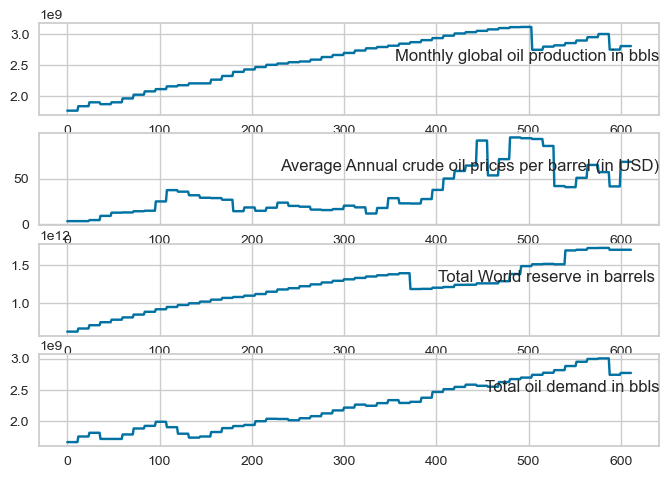

In [108]:
#visualizing how data is distributed
values = df.values
groups = [0, 1, 2, 3]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

In [109]:
df.columns

Index(['Monthly global oil production in bbls',
       'Average Annual crude oil prices per barrel (in USD)',
       'Total World reserve in barrels ', 'Total oil demand in bbls',
       'Adjusting  prices for inflation'],
      dtype='object')

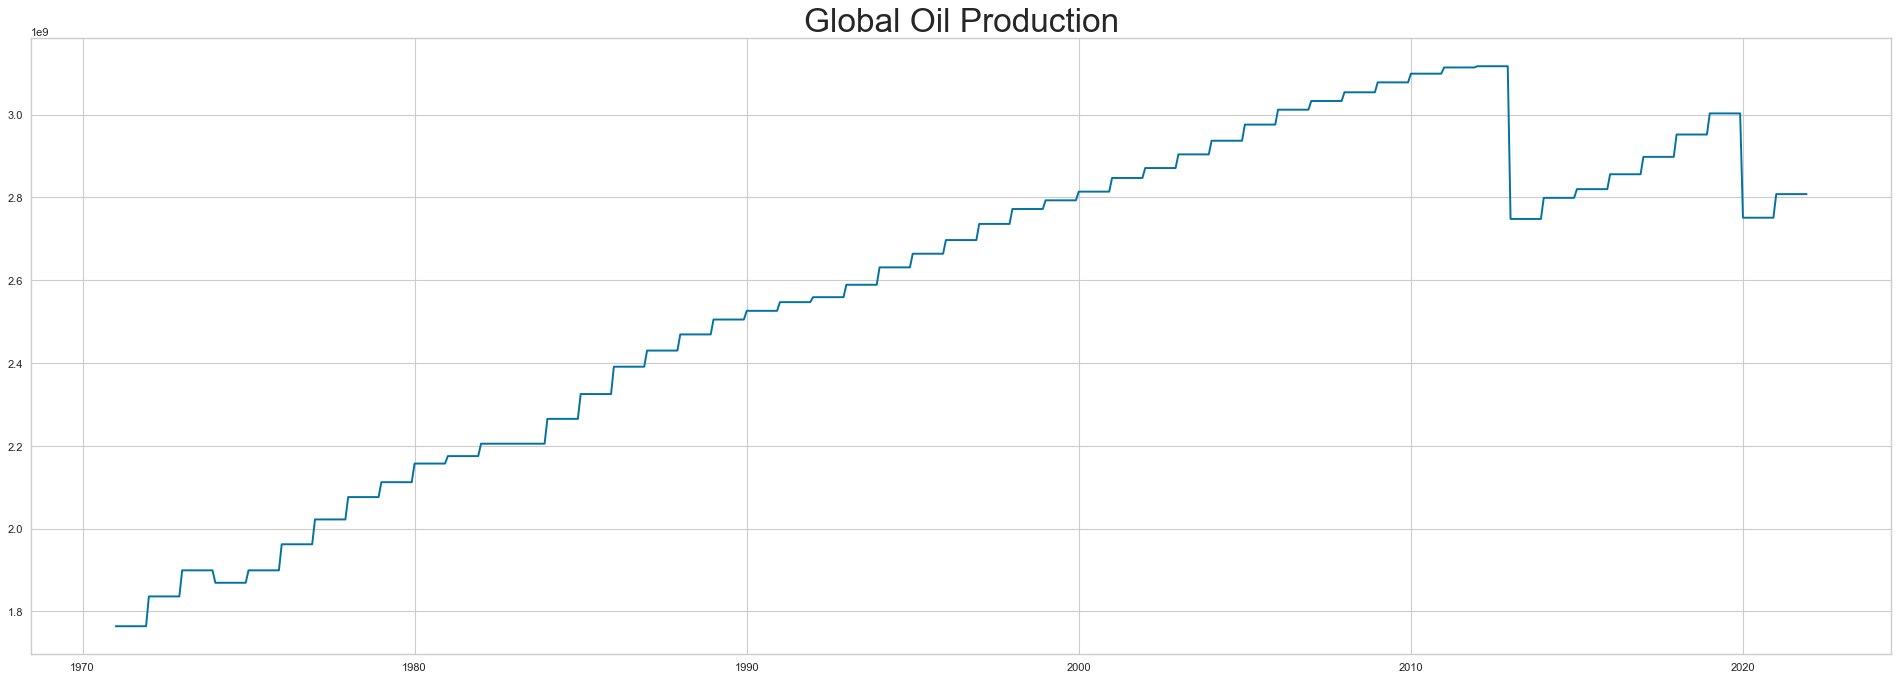

In [110]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Global Oil Production', fontsize=30)

plt.plot(df['Monthly global oil production in bbls'])

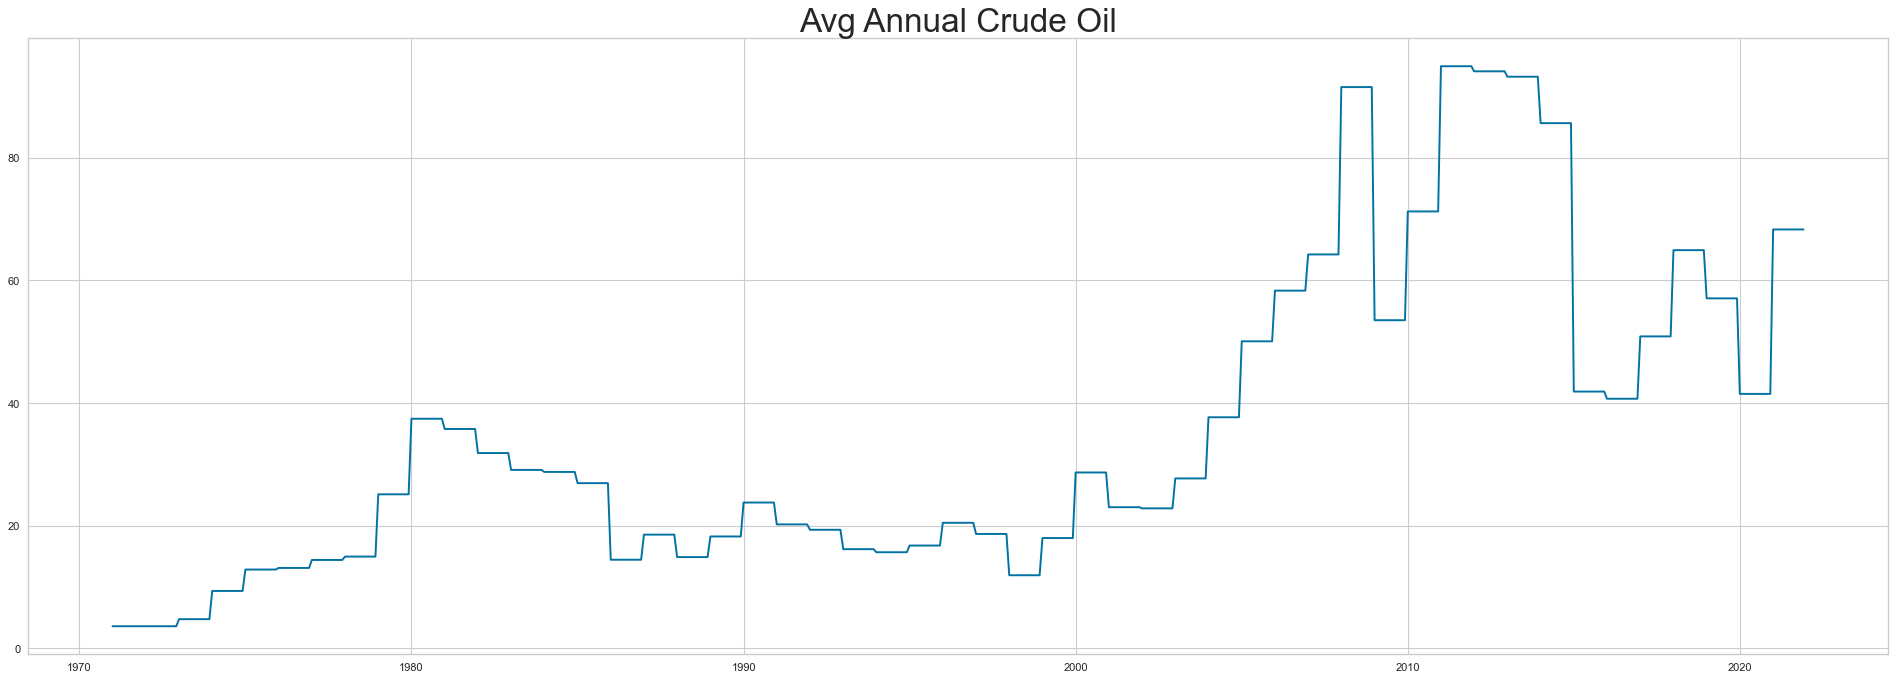

In [111]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Avg Annual Crude Oil', fontsize=30)

plt.plot(df['Average Annual crude oil prices per barrel (in USD)'])

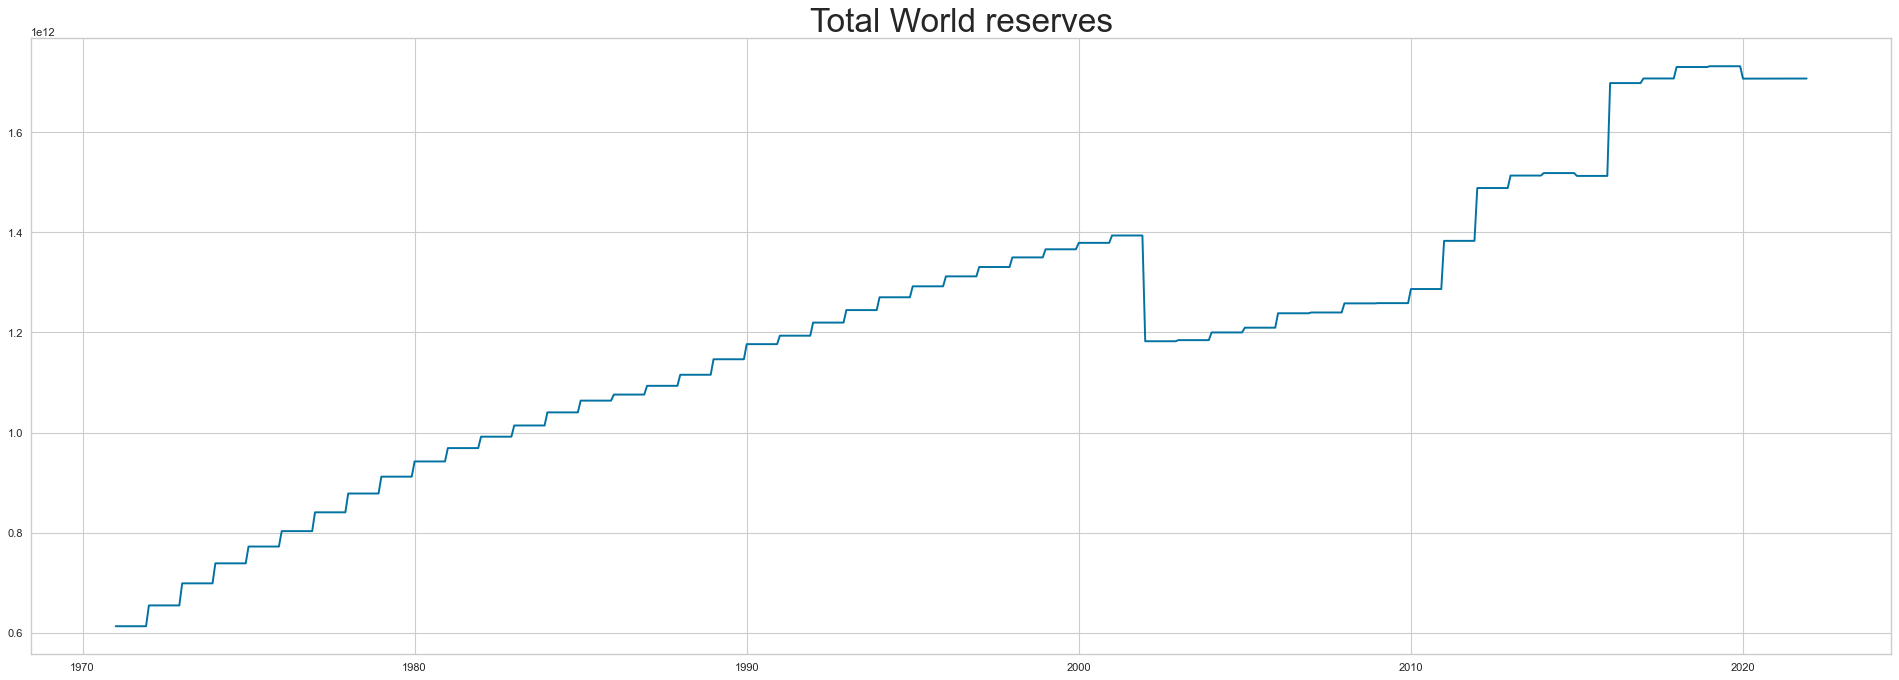

In [112]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Total World reserves', fontsize=30)

plt.plot(df['Total World reserve in barrels '])

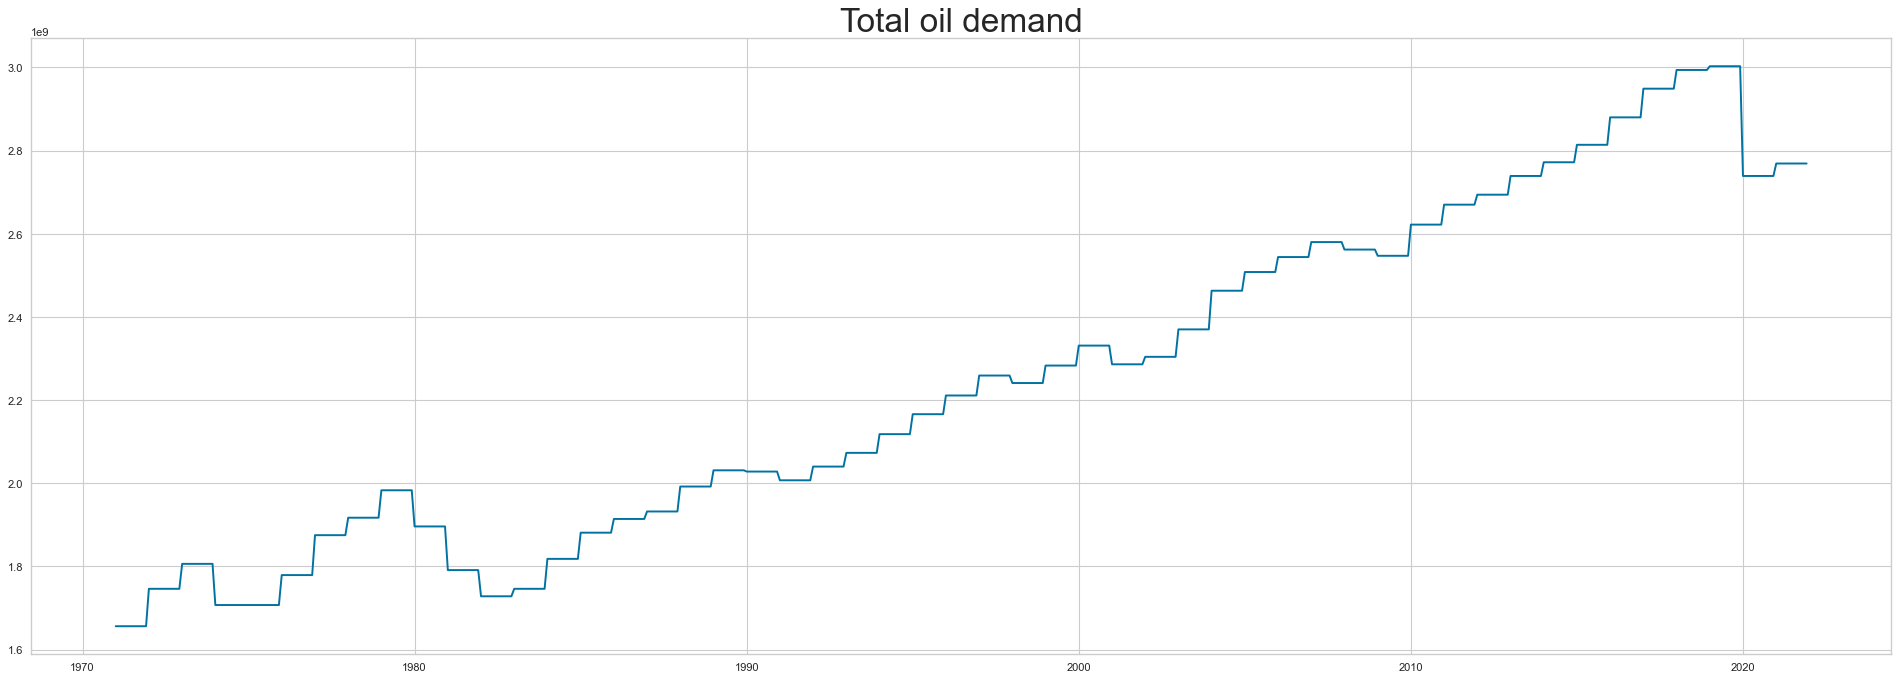

In [113]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Total oil demand', fontsize=30)

plt.plot(df['Total oil demand in bbls'])

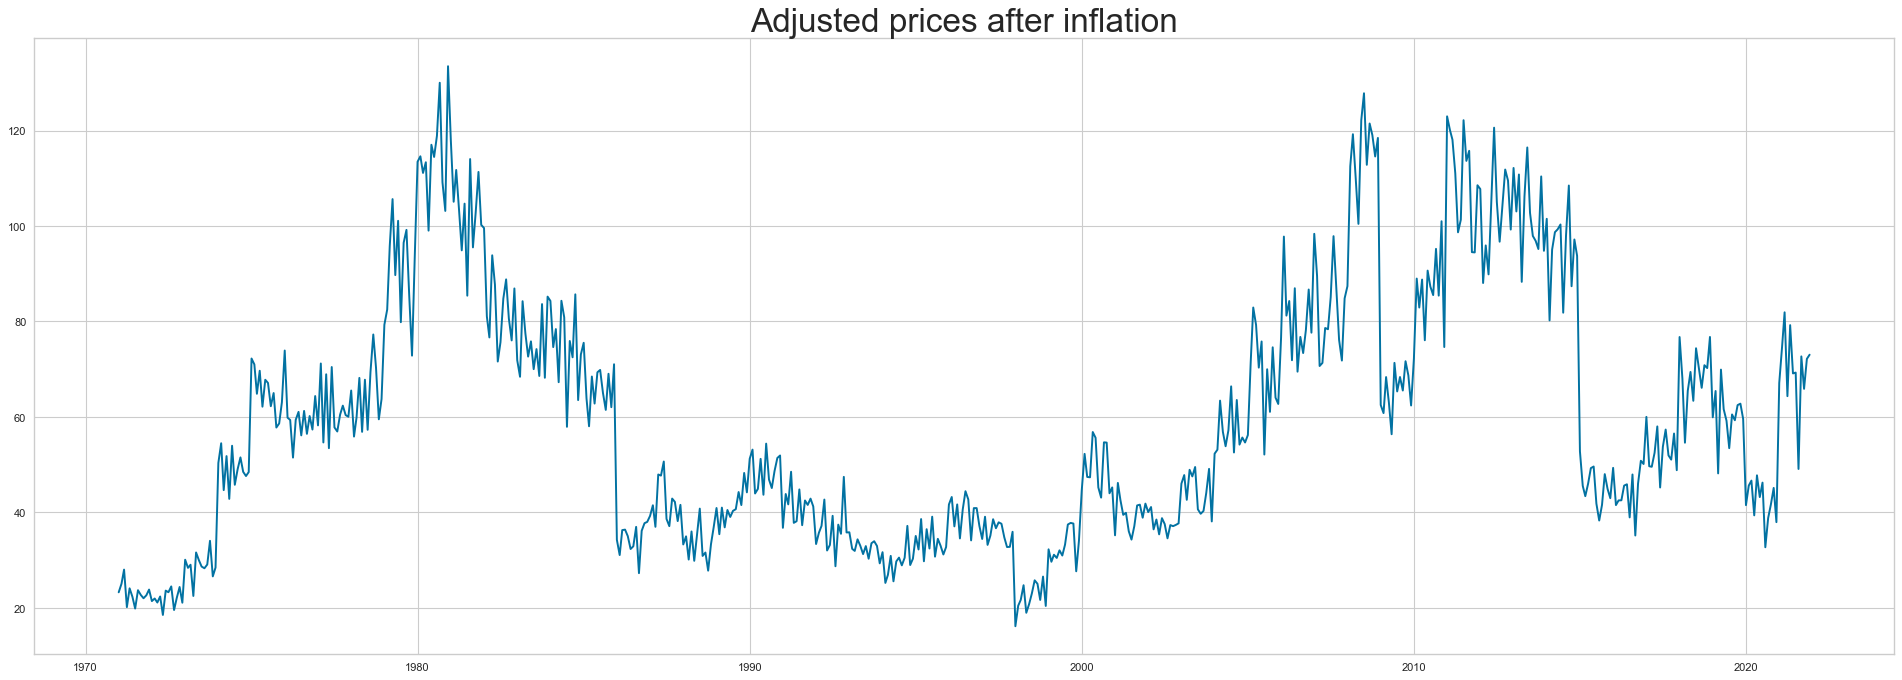

In [114]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Adjusted prices after inflation', fontsize=30)

plt.plot(df['Adjusting  prices for inflation'])

<AxesSubplot:>

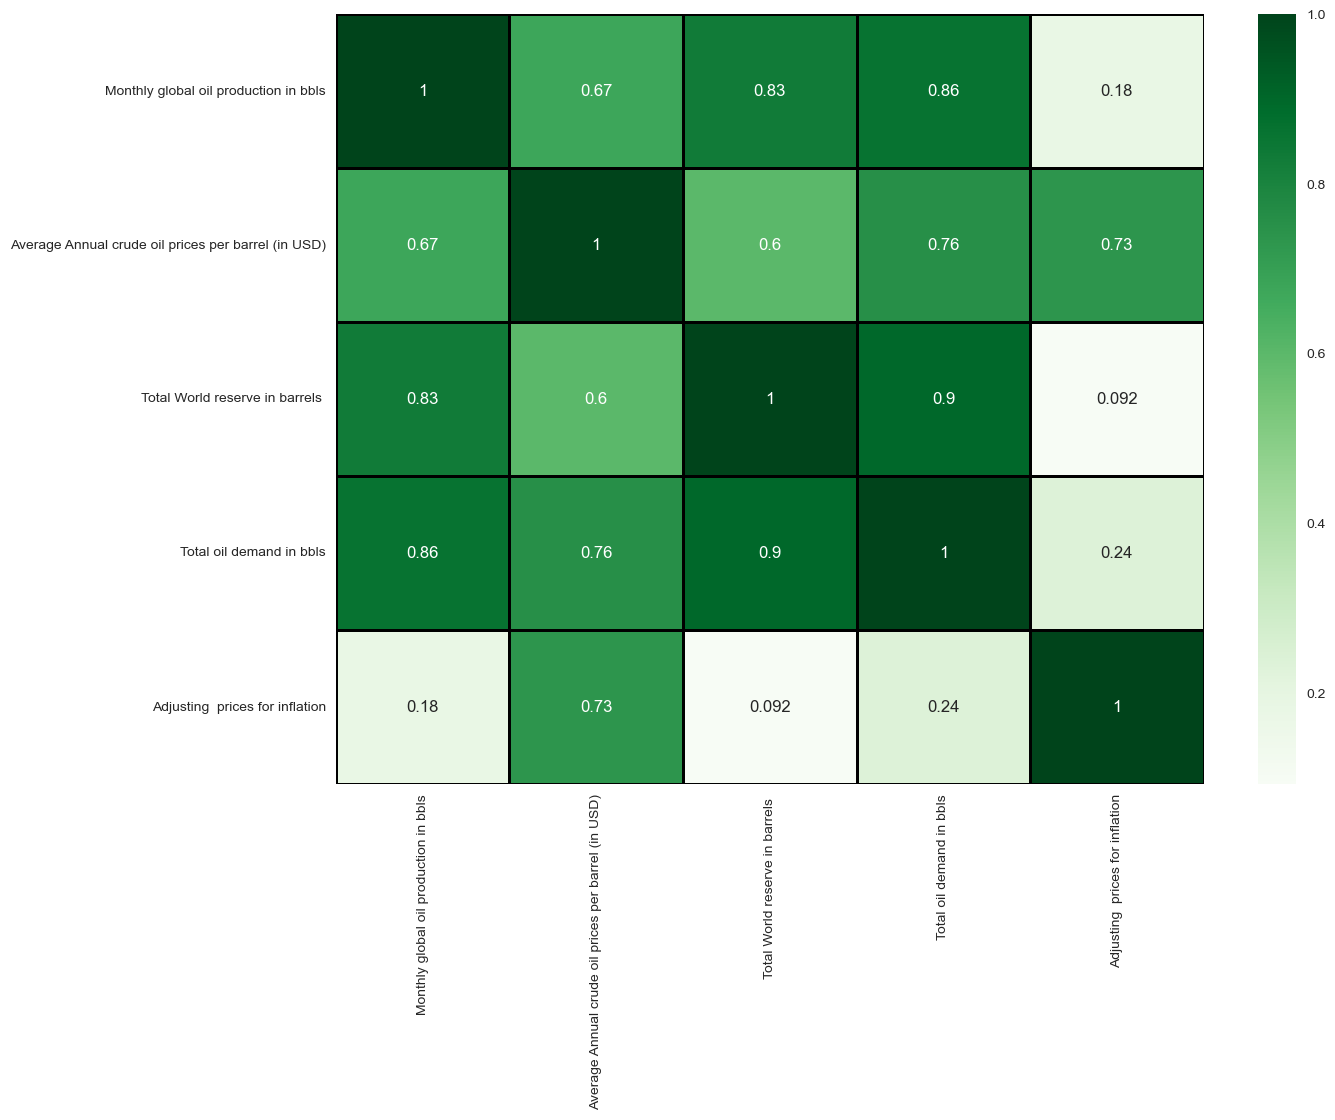

In [115]:
# Correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='Greens', annot=True)

# Noise

Text(0.5, 1.0, 'Mean over time')

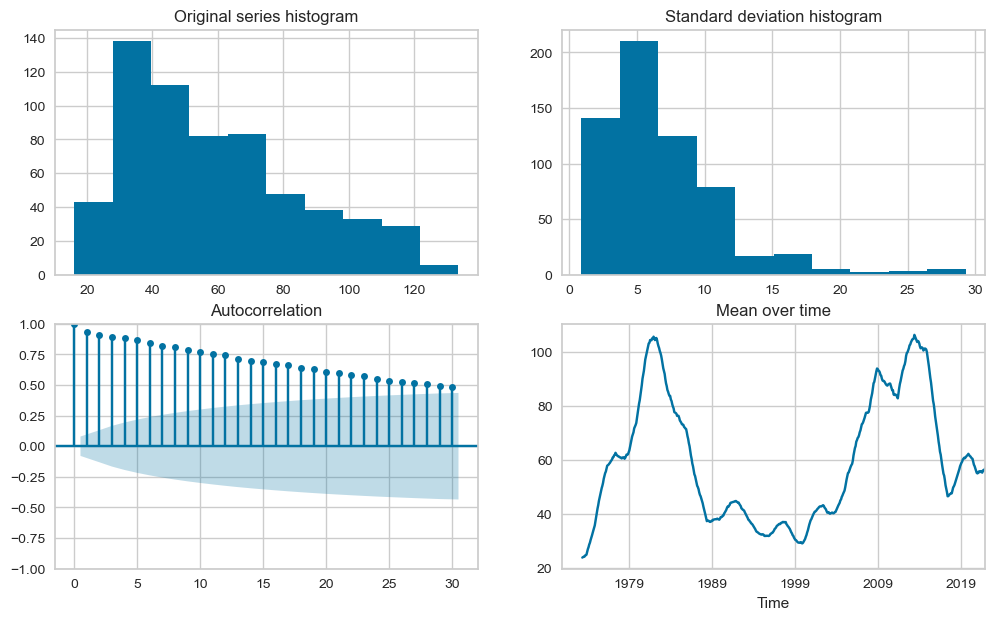

In [116]:
series = df['Adjusting  prices for inflation'].values
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df['Adjusting  prices for inflation'].hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = df['Adjusting  prices for inflation'].rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = df['Adjusting  prices for inflation'].rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

In [117]:
Array=np.array(df['Adjusting  prices for inflation'])

# Check for sationarity
## Autocorrelation and Partial autocorrelation plots

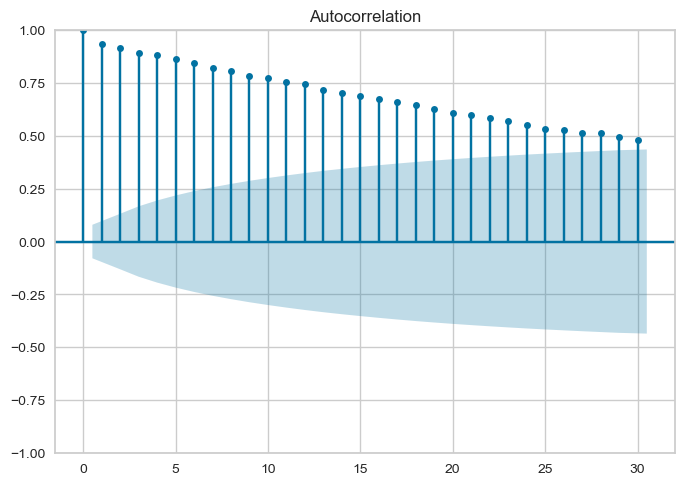

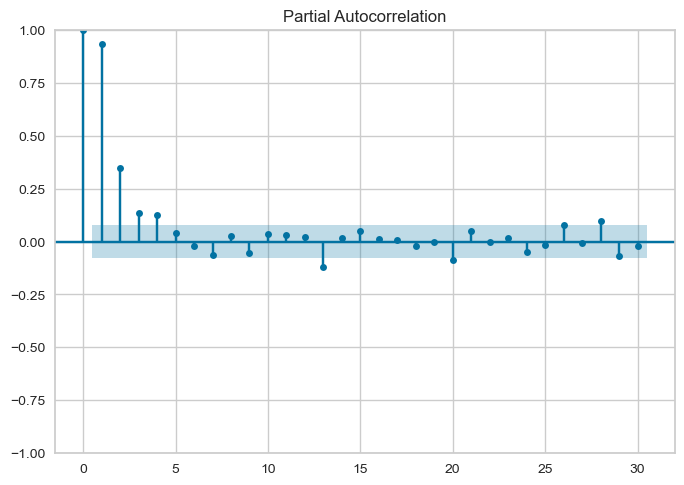

In [118]:
plot_acf(Array, lags=30)
plot_pacf(Array, lags=30)
plt.show()

# Rolling means and standard deviation of our series

In [119]:
Arraydf=pd.DataFrame(Array)

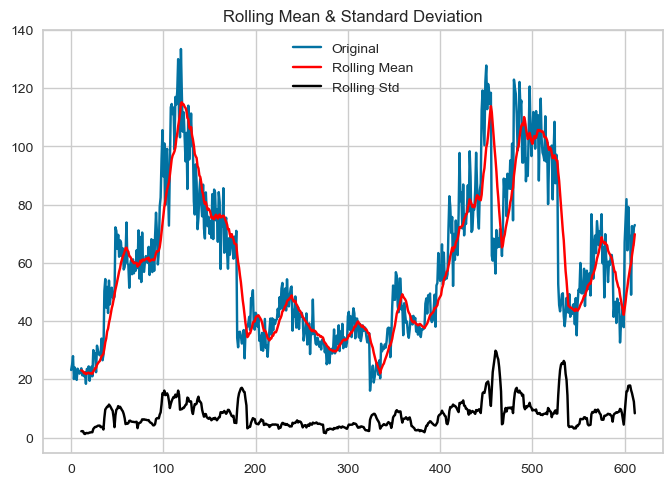

In [120]:
# Determing rolling statistics
rolmean = Arraydf.rolling(window=12).mean()
rolstd = Arraydf.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(Arraydf, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Multivariate time series forecasting

In [121]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [122]:
split_date = '2019-01-12'
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

577 days of training data 
 35 days of testing data 


In [123]:
X_train_df, y_train = create_time_features(
    df_training, target='Adjusting  prices for inflation')
X_test_df, y_test = create_time_features(df_test, target='Adjusting  prices for inflation')
scaler = StandardScaler()
scaler.fit(X_train_df)  
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [124]:
X_train_df

,Monthly global oil production in bbls,Average Annual crude oil prices per barrel (in USD),Total World reserve in barrels,Total oil demand in bbls,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
0,-2.013990,-1.198985,-2.116736,-1.456567,0.0,0.499675,-1.338392,-1.588384,-1.696283,-1.581773,1.102625,0.733560,0.0,1.765626
1,-2.013990,-1.198985,-2.116736,-1.456567,0.0,-1.502495,-1.338392,-1.299085,-1.696283,-1.287127,0.672570,1.135192,0.0,-1.402343
2,-2.013990,-1.198985,-2.116736,-1.456567,0.0,-1.502495,-1.338392,-1.009787,-1.696283,-1.020994,-0.596994,-1.306176,0.0,-1.138346
3,-2.013990,-1.198985,-2.116736,-1.456567,0.0,-0.000867,-0.444582,-0.720488,-1.696283,-0.726347,0.012106,-1.363506,0.0,-0.874348
4,-2.013990,-1.198985,-2.116736,-1.456567,0.0,1.000218,-0.444582,-0.431190,-1.696283,-0.441205,1.335923,-0.071238,0.0,-0.610351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.978841,1.214148,2.068707,2.068414,0.0,1.000218,0.449229,0.726004,1.690164,0.727879,-1.426913,0.682001,0.0,0.577637
573,0.978841,1.214148,2.068707,2.068414,0.0,-1.502495,1.343039,1.015302,1.690164,1.013021,-1.079029,-1.066026,0.0,0.907634
574,0.978841,1.214148,2.068707,2.068414,0.0,-0.000867,1.343039,1.304600,1.690164,1.307668,-0.534117,-1.323319,0.0,1.171632
575,0.978841,1.214148,2.068707,2.068414,0.0,1.000218,1.343039,1.593899,1.690164,1.592810,1.208584,-0.562407,0.0,1.435629


In [125]:
y_train

Time
1971-01-01    23.218150
1971-02-01    25.024262
1971-03-01    27.977770
1971-04-01    20.111408
1971-05-01    24.047567
                ...    
2018-09-01    66.071919
2018-10-01    70.817994
2018-11-01    70.216938
2018-12-01    76.737637
2019-01-01    59.896301
Name: Adjusting  prices for inflation, Length: 577, dtype: float64

# Bayesian regression

In [126]:
import sys
!{sys.executable} -m pip install yellowbrick

In [127]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)

In [128]:
yhat

array([56.75228505, 56.58047726, 56.76367855, 56.91834301, 56.71138832,
       56.59855965, 56.29667273, 56.01799198, 56.22439809, 56.11770212,
       56.33777966, 30.45784215, 30.18929761, 29.76188799, 29.87878039,
       30.10779118, 30.75370507, 30.17343647, 29.88878686, 30.34206338,
       29.48831745, 29.29053714, 30.22131685, 65.79654763, 67.29616269,
       67.12435489, 66.54975016, 66.70441461, 67.25526596, 66.38463125,
       66.08274434, 66.56186962, 66.01046969, 66.66157976, 66.8816573 ])

In [129]:
y_test.values

array([65.40980115, 48.13933396, 69.89509297, 61.59756274, 59.17493513,
       53.4321609 , 60.49414936, 59.28284386, 62.45030793, 62.75729849,
       59.57274968, 41.48651465, 45.58752921, 46.62845314, 39.34551972,
       47.73323049, 43.17136575, 46.20468175, 32.66002582, 38.77435104,
       41.61396362, 45.09315066, 37.92258341, 67.08221935, 74.63246504,
       81.90247835, 64.33041048, 79.21770802, 69.09316871, 69.27380035,
       49.06650715, 72.66250659, 65.86255374, 72.1454112 , 73.01815625])

In [130]:
import copy
# Shallow copy of the arrayy_
yhat1= copy.copy(y_test)
for i in range(len(yhat1)):
    yhat1[i]=yhat[i]

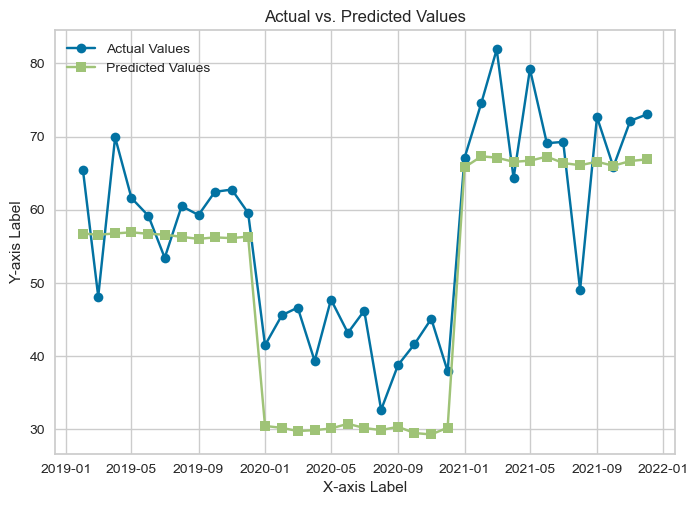

In [131]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot


# Create a line plot for actual values
plt.plot(y_test, label='Actual Values', marker='o')

# Create a line plot for predicted values
plt.plot(yhat1, label='Predicted Values', marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


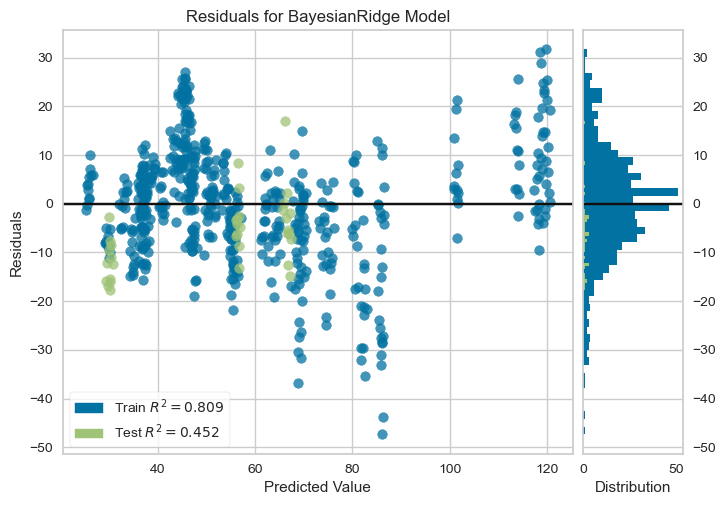

<AxesSubplot:title={'center':'Residuals for BayesianRidge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [132]:
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

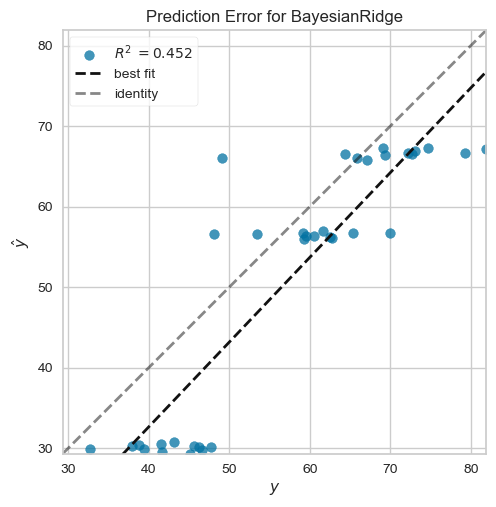

<AxesSubplot:title={'center':'Prediction Error for BayesianRidge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [133]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(reg) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show()


# Random Forest

In [134]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)

In [135]:
yhat

array([67.76690952, 67.76690952, 67.76690952, 67.76690952, 67.76690952,
       67.76690952, 67.76690952, 67.76690952, 67.76690952, 67.76690952,
       67.76690952, 71.69164883, 71.69164883, 71.69164883, 71.69164883,
       71.69164883, 71.69164883, 71.69164883, 71.69164883, 71.69164883,
       71.69164883, 71.69164883, 71.69164883, 78.42732563, 78.42732563,
       78.42732563, 78.42732563, 78.42732563, 78.42732563, 78.42732563,
       78.42732563, 78.42732563, 78.42732563, 78.42732563, 78.42732563])

In [136]:
y_test.values

array([65.40980115, 48.13933396, 69.89509297, 61.59756274, 59.17493513,
       53.4321609 , 60.49414936, 59.28284386, 62.45030793, 62.75729849,
       59.57274968, 41.48651465, 45.58752921, 46.62845314, 39.34551972,
       47.73323049, 43.17136575, 46.20468175, 32.66002582, 38.77435104,
       41.61396362, 45.09315066, 37.92258341, 67.08221935, 74.63246504,
       81.90247835, 64.33041048, 79.21770802, 69.09316871, 69.27380035,
       49.06650715, 72.66250659, 65.86255374, 72.1454112 , 73.01815625])

In [137]:
import copy
# Shallow copy of the arrayy_
yhat1= copy.copy(y_test)
for i in range(len(yhat1)):
    yhat1[i]=yhat[i]

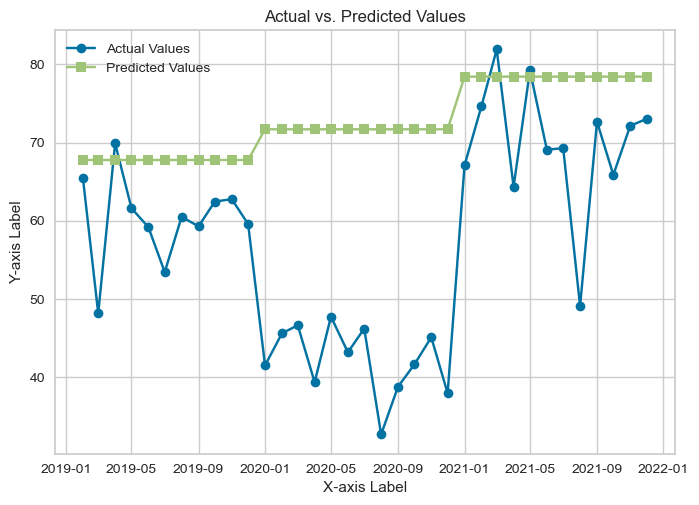

In [138]:
import matplotlib.pyplot as plt



# Create a line plot for actual values
plt.plot(y_test, label='Actual Values', marker='o')

# Create a line plot for predicted values
plt.plot(yhat1, label='Predicted Values', marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

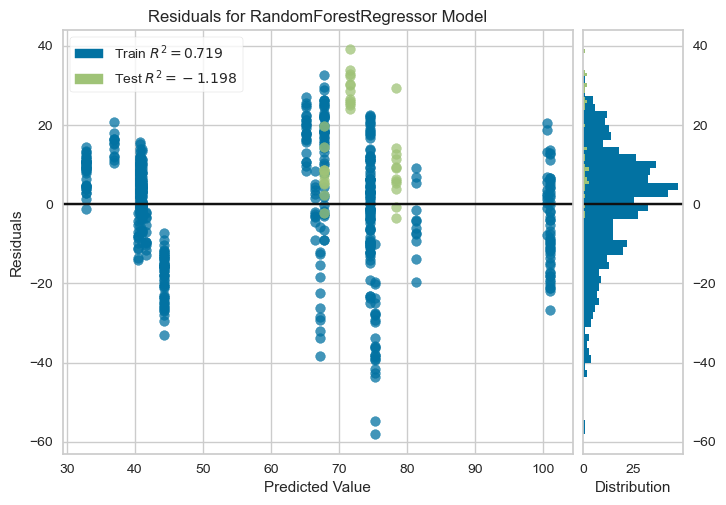

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [139]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

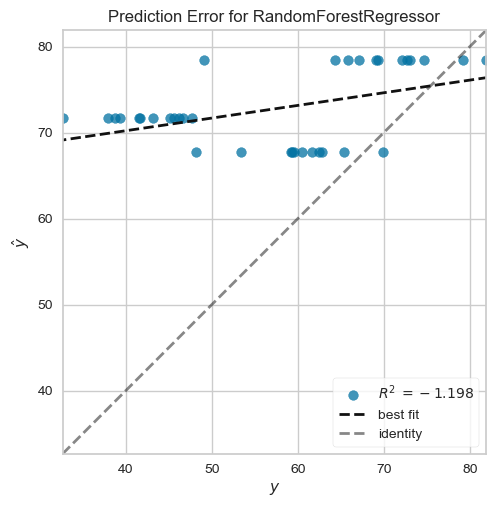

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [140]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(reg) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show()


# XGBoost

In [141]:
import sys
!{sys.executable} -m pip install xgboost

In [142]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=True)  
yhat = reg.predict(X_test)

In [143]:
yhat

array([58.718452, 54.600983, 62.394897, 58.08987 , 58.319798, 65.88245 ,
       61.740868, 55.89656 , 65.47315 , 68.129265, 63.89602 , 57.559143,
       47.45237 , 51.79817 , 51.52527 , 50.026142, 55.597363, 53.284355,
       48.453594, 49.727318, 53.725098, 52.59176 , 53.315636, 75.26033 ,
       78.60313 , 75.961   , 79.065315, 80.3732  , 82.15939 , 77.09514 ,
       77.32928 , 82.95375 , 75.12545 , 87.41317 , 75.02778 ],
      dtype=float32)

In [144]:
y_test.values

array([65.40980115, 48.13933396, 69.89509297, 61.59756274, 59.17493513,
       53.4321609 , 60.49414936, 59.28284386, 62.45030793, 62.75729849,
       59.57274968, 41.48651465, 45.58752921, 46.62845314, 39.34551972,
       47.73323049, 43.17136575, 46.20468175, 32.66002582, 38.77435104,
       41.61396362, 45.09315066, 37.92258341, 67.08221935, 74.63246504,
       81.90247835, 64.33041048, 79.21770802, 69.09316871, 69.27380035,
       49.06650715, 72.66250659, 65.86255374, 72.1454112 , 73.01815625])

In [145]:
import copy
# Shallow copy of the arrayy_
yhat1= copy.copy(y_test)
for i in range(len(yhat1)):
    yhat1[i]=yhat[i]

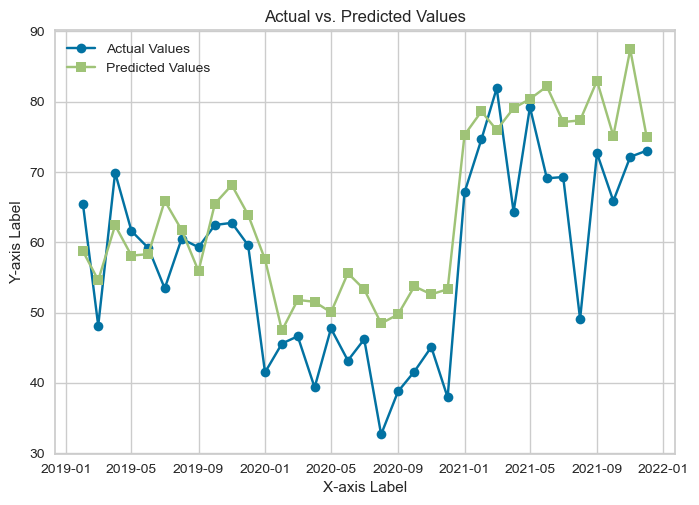

In [146]:
import matplotlib.pyplot as plt



# Create a line plot for actual values
plt.plot(y_test, label='Actual Values', marker='o')

# Create a line plot for predicted values
plt.plot(yhat1, label='Predicted Values', marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

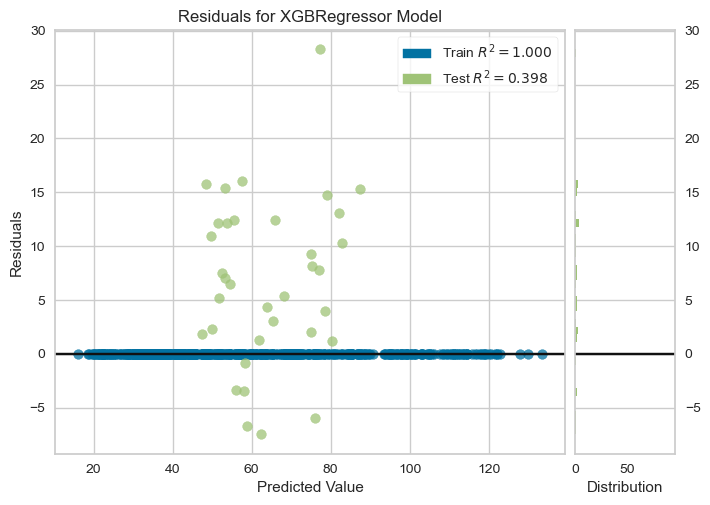

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [147]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

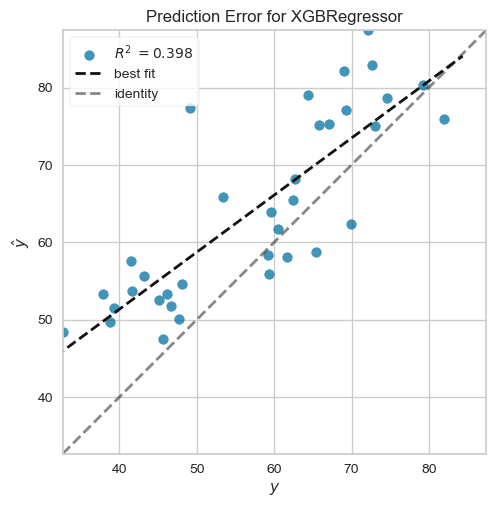

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [148]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(reg) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show()


## Feature Importance Using XGBoost

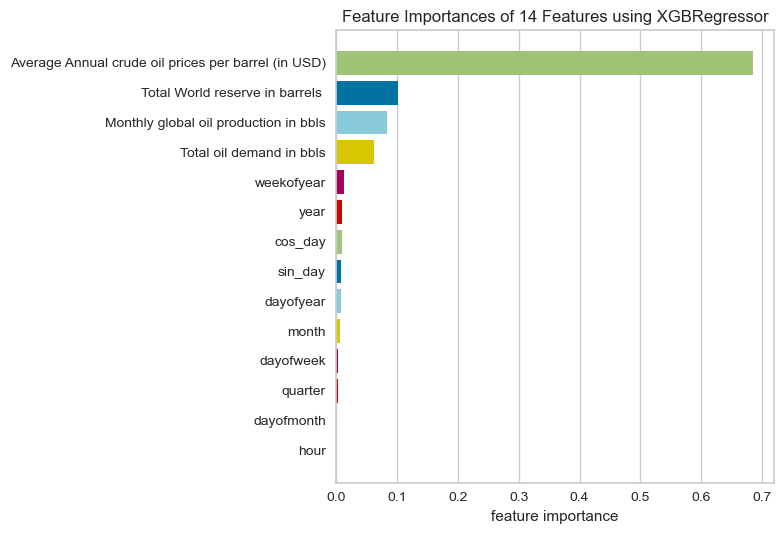

<AxesSubplot:title={'center':'Feature Importances of 14 Features using XGBRegressor'}, xlabel='feature importance'>

In [149]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(reg,relative=False)
#fit on train dataset
viz.fit(X_train_df, y_train)
#show plot and save at output path
viz.show()


# ARIMA-X

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



# Prepare exogenous variables
exog_vars = df[['Monthly global oil production in bbls',
       'Average Annual crude oil prices per barrel (in USD)','Total World reserve in barrels ']]  # Replace with your actual exogenous variables
exog_vars_test = df[['Monthly global oil production in bbls',
       'Average Annual crude oil prices per barrel (in USD)','Total World reserve in barrels ']]


# Fit ARIMA-X model
order = (1, 0, 0)  # ARIMA order (p, d, q)
model = sm.tsa.ARIMA(df['Adjusting  prices for inflation'], order=order, exog=exog_vars.iloc[:])
results = model.fit()

# Forecast with ARIMA-X model
yhat = results.predict()

In [151]:
yhat=yhat.iloc[577:]
yhat.values

array([59.88440777, 64.12487145, 50.84205811, 67.57453459, 61.19285747,
       59.32960097, 54.91280104, 60.34421604, 59.41259418, 61.84870859,
       62.08481675, 47.06300936, 42.82240555, 45.97651888, 46.77709933,
       41.17575432, 47.6267898 , 44.118234  , 46.45117437, 36.0339034 ,
       40.73646528, 42.92042726, 45.59628957, 70.90031749, 69.62412859,
       75.43106497, 81.02247304, 67.50769693, 78.9576011 , 71.17076104,
       71.30968585, 55.76814313, 73.91595885, 68.68607691, 73.51825788])

In [152]:
y_test.values

array([65.40980115, 48.13933396, 69.89509297, 61.59756274, 59.17493513,
       53.4321609 , 60.49414936, 59.28284386, 62.45030793, 62.75729849,
       59.57274968, 41.48651465, 45.58752921, 46.62845314, 39.34551972,
       47.73323049, 43.17136575, 46.20468175, 32.66002582, 38.77435104,
       41.61396362, 45.09315066, 37.92258341, 67.08221935, 74.63246504,
       81.90247835, 64.33041048, 79.21770802, 69.09316871, 69.27380035,
       49.06650715, 72.66250659, 65.86255374, 72.1454112 , 73.01815625])

In [153]:
import copy
# Shallow copy of the arrayy_
yhat1= copy.copy(y_test)
for i in range(len(yhat1)):
    yhat1[i]=yhat[i]

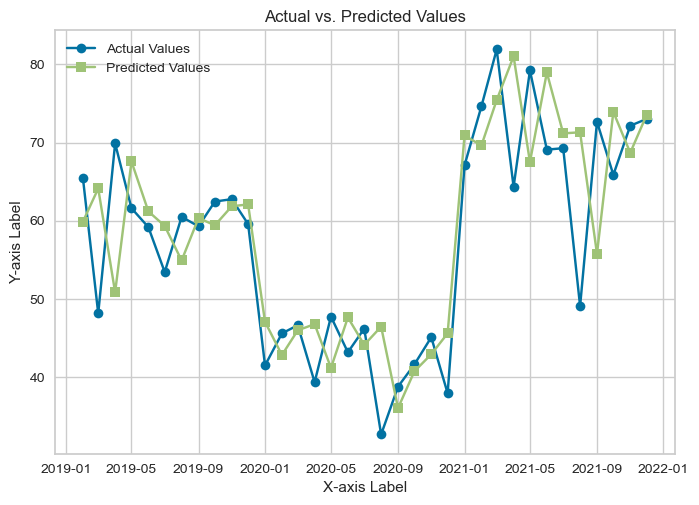

In [154]:
import matplotlib.pyplot as plt



# Create a line plot for actual values
plt.plot(y_test, label='Actual Values', marker='o')

# Create a line plot for predicted values
plt.plot(yhat1, label='Predicted Values', marker='s')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [155]:
# Compute the mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Compute the mean squared error
mse_br = mean_squared_error(y_test, yhat)

# Compute the root mean squared error
rmse_br = np.sqrt(mse_br)

print('RMSE Bayesian regression:',rmse_br)


RMSE Bayesian regression: 8.703751128620727


## Forecasting Oil Prices For Next 2 Years

In [156]:
yhat = results.forecast(steps=24,exog=exog_vars[:24])

In [157]:
yhat.values

array([52.67282761, 53.57370775, 54.26657973, 54.79947146, 55.20932148,
       55.52453944, 55.76697534, 55.95343415, 56.09684067, 56.20713543,
       56.29196375, 56.35720569, 53.61510575, 53.65369788, 53.68337931,
       53.70620746, 53.72376472, 53.73726811, 53.74765364, 53.75564122,
       53.7617845 , 53.76650934, 53.77014323, 53.77293808])

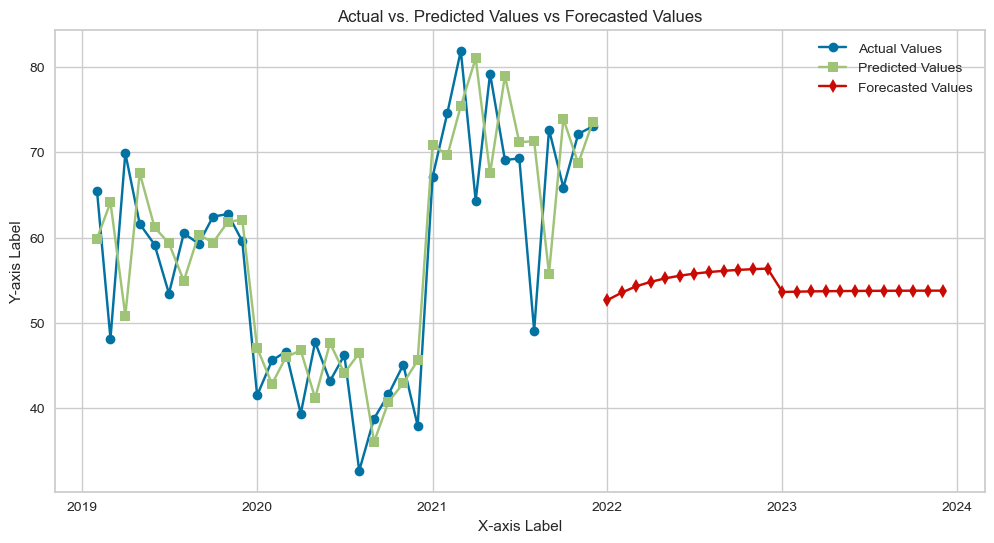

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) #

# Create a line plot for actual values
plt.plot(y_test, label='Actual Values', marker='o')

# Create a line plot for predicted values
plt.plot(yhat1, label='Predicted Values', marker='s')

plt.plot(yhat, label='Forecasted Values', marker='d')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values vs Forecasted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()